In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [ ]:
## COGER LOS CITAS PAR A PAR (pairwise links) PARA GENERAR LOS HYPERDEGES como en Cora
edges_list = []

file_path = "../PubMed_orig/PubMed_orig/data/Pubmed-Diabetes.DIRECTED.cites.tab"

# Proceso el archivo con las citas
with open(file_path, "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("NO_FEATURES"):
            continue
        
        parts = line.split("\t")
        print(parts)
        if len(parts) < 3:
            continue  
        
        # Extract source and target
        source = parts[1].replace("paper:", "").replace("|", "").strip()
        target = parts[3].replace("paper:", "").replace("|", "").strip()
        
        edges_list.append([source, target])


['DIRECTED', 'cites']
['33824', 'paper:19127292', '|', 'paper:17363749']
['37511', 'paper:19668377', '|', 'paper:17293876']
['6735', 'paper:1313726', '|', 'paper:3002783']
['33493', 'paper:19110882', '|', 'paper:14578298']
['27380', 'paper:18606979', '|', 'paper:10333910']
['37858', 'paper:19735543', '|', 'paper:8420806']
['34760', 'paper:19228402', '|', 'paper:17017752']
['34707', 'paper:19220880', '|', 'paper:12734781']
['13481', 'paper:16595006', '|', 'paper:11790819']
['33995', 'paper:19143817', '|', 'paper:11206408']
['4691', 'paper:11943852', '|', 'paper:7722468']
['27798', 'paper:18644886', '|', 'paper:3138126']
['46909', 'paper:8325993', '|', 'paper:2186054']
['25881', 'paper:18509207', '|', 'paper:15043684']
['19960', 'paper:17894830', '|', 'paper:2044434']
['50566', 'paper:9326333', '|', 'paper:7487991']
['34769', 'paper:19228405', '|', 'paper:11561483']
['15675', 'paper:17144912', '|', 'paper:1324940']
['9306', 'paper:1541672', '|', 'paper:1991568']
['23485', 'paper:18349042

In [3]:
edges = pd.DataFrame(edges_list, columns=["source", "target"])
print(edges.head())
print("Number of edges:", len(edges))

     source    target
0  19127292  17363749
1  19668377  17293876
2   1313726   3002783
3  19110882  14578298
4  18606979  10333910
Number of edges: 44338


In [4]:
pubmed = pd.read_csv("../PubMed_dataset.csv")

In [5]:
valid_ids = pubmed.iloc[:, 0].tolist()

edges["source"] = edges["source"].astype(int)
edges["target"] = edges["target"].astype(int)
filtered_cites = edges[
    edges["source"].isin(valid_ids) & edges["target"].isin(valid_ids)]

len(filtered_cites)

44337

In [6]:
print(filtered_cites.head())
print(f"Number of edges: {len(filtered_cites)}") 

     source    target
0  19127292  17363749
1  19668377  17293876
2   1313726   3002783
3  19110882  14578298
4  18606979  10333910
Number of edges: 44337


In [7]:
filtered_cites.to_csv("./Pairwise_cite_PubMed.csv", index=False)

In [7]:
outgoing = edges.groupby('source')['target'].apply(set).to_dict()
incoming = edges.groupby('target')['source'].apply(set).to_dict()

nodes = set(edges['source']).union(edges['target'])

hyperedges = {}

for node in nodes:
    cites = outgoing.get(node, set())
    cited_by = incoming.get(node, set())
    hyperedges[node] = cites.union(cited_by)


print(hyperedges)

{11272194: {18483609, 16710474, 16537919}, 11796484: {17472435, 16823478, 17433304, 18664617, 18048763, 17535961}, 10616837: {11563971, 17623014, 15647337, 18474939, 18319310}, 11272209: {12060768, 18654634}, 11272210: {19654863}, 11272211: {18654634, 16229747, 18297260, 19672314}, 10616858: {17290035, 16801574}, 9437215: {15201238}, 16777248: {19364331}, 1703973: {1737841, 8371347, 1359788, 1658791}, 8388664: {7506712}, 17039422: {19436648, 18628530, 18686043, 18769687}, 11927616: {6367043, 3525284, 11160133, 7532678, 10479395, 1346821, 10895849, 16280647, 8808683, 7761837, 3666319, 11092697, 8098394, 17088564, 10330297, 3125434, 18455963, 7657822}, 1704001: {1393277}, 7733315: {11110735}, 19398738: {9742976, 18332288, 10938048, 16230722, 3527619, 10751238, 17519421, 18539917, 7587918, 17192335, 15049937, 16936151, 15914522, 15505121, 18372388, 17098087, 16612330, 16371630, 9676718, 16823472, 18725615, 16823478, 15975101}, 17563730: {9000706, 10579460, 7944837, 10510950, 7789640, 8366

In [8]:
pubmed_ROBERTA_embs = np.load("./PubMed_embeddings.npz")["embeddings"]
print("Embeddings shape:", pubmed_ROBERTA_embs.shape)

Embeddings shape: (19716, 768)


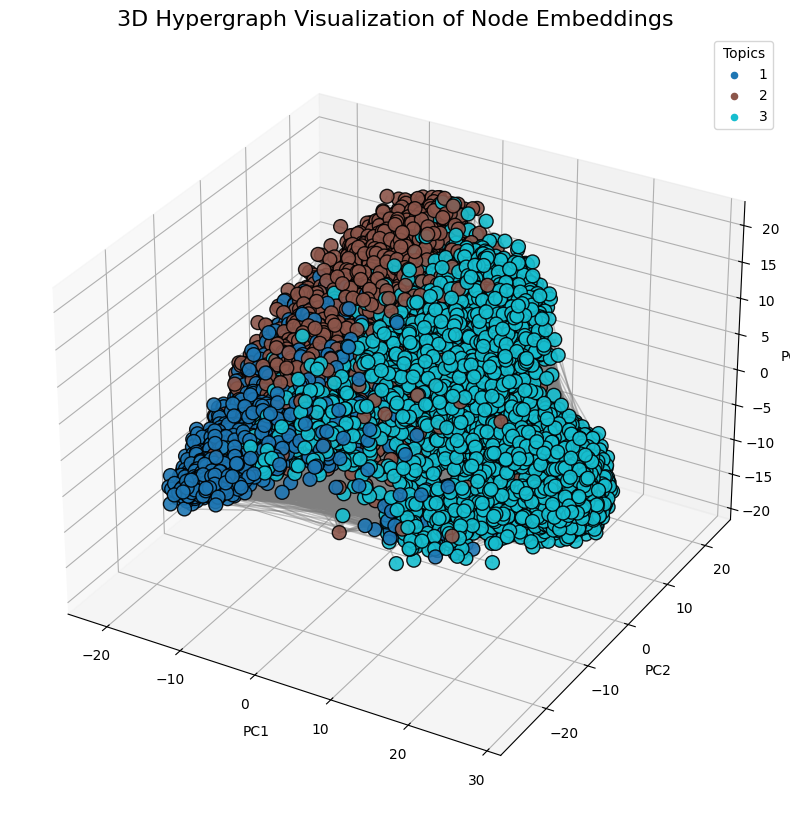

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder


nodes_list = [n for n in nodes]
pubmed = pubmed[pubmed["PMID"].isin(nodes_list)]
embs = pubmed_ROBERTA_embs

scaler = StandardScaler()
embs_scaled = scaler.fit_transform(embs)

pca = PCA(n_components=3)
embs_3d = pca.fit_transform(embs_scaled)

node_to_coord = {node: emb for node, emb in zip(nodes_list, embs_3d)}

le = LabelEncoder()
pubmed['label_encoded'] = le.fit_transform(pubmed['label'])
pubmed
y_labels = pubmed["label_encoded"].values
class_names = le.classes_

colors = plt.cm.tab10(np.linspace(0, 1, len(class_names)))
node_colors = [colors[label] for label in y_labels]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotear nodes
ax.scatter(embs_3d[:, 0], embs_3d[:, 1], embs_3d[:, 2],
           c=node_colors, s=100, edgecolor='k', alpha=0.9)


for node, neighbors in hyperedges.items():
    if node not in node_to_coord:
        continue  

    for nbr in neighbors:
        if nbr not in node_to_coord:
            continue  

        x = [node_to_coord[node][0], node_to_coord[nbr][0]]
        y = [node_to_coord[node][1], node_to_coord[nbr][1]]
        z = [node_to_coord[node][2], node_to_coord[nbr][2]]

        ax.plot(x, y, z, c='gray', alpha=0.25, lw=1)

ax.set_title("3D Hypergraph Visualization of Node Embeddings", fontsize=16)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


for class_idx, class_name in enumerate(class_names):
    ax.scatter([], [], [], c=[colors[class_idx]], label=class_name)
ax.legend(title="Topics")

plt.show()


In [10]:
num_neighbors = [len(neighbors) for neighbors in hyperedges.values()]
mean_neighbors = sum(num_neighbors) / len(num_neighbors)
print("Mean number of nodes per hyperedge:", mean_neighbors)

Mean number of nodes per hyperedge: 4.496170817061419


In [11]:
d = dict()
for node, nbr in hyperedges.items():
    if node == 11927616:
        d[11927616] = nbr
        print(nbr)

s = list()
for k, v in d.items():
    s.append(k)
    for val in v:
        s.append(val)
len(s)

{6367043, 3525284, 11160133, 7532678, 10479395, 1346821, 10895849, 16280647, 8808683, 7761837, 3666319, 11092697, 8098394, 17088564, 10330297, 3125434, 18455963, 7657822}


19

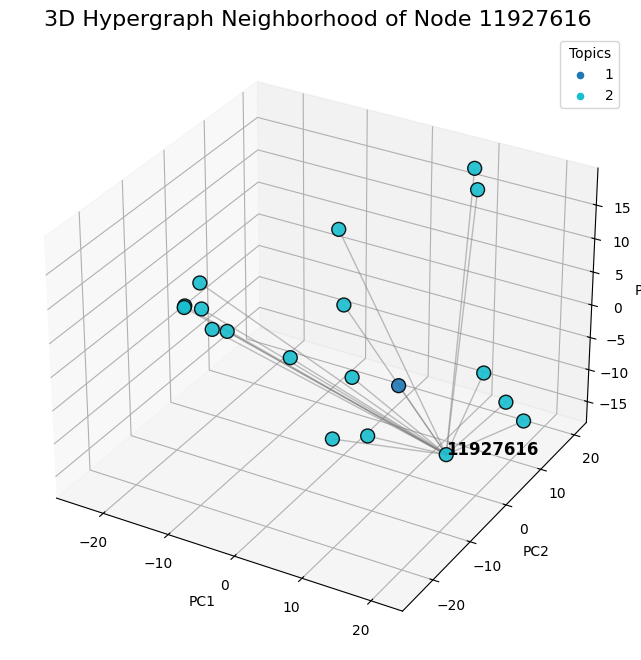

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

# Node of interest
target_node = 11927616

# Get the node + its neighbors
nodes_to_plot = [target_node] + list(d[target_node])

pubmed_sub = pubmed[pubmed["PMID"].isin(nodes_to_plot)].copy()
embs_sub = pubmed_ROBERTA_embs[[nodes_list.index(n) for n in nodes_to_plot]]

scaler = StandardScaler()
embs_scaled = scaler.fit_transform(embs_sub)

pca = PCA(n_components=3)
embs_3d = pca.fit_transform(embs_scaled)

node_to_coord = {node: emb for node, emb in zip(nodes_to_plot, embs_3d)}

le = LabelEncoder()
pubmed_sub['label_encoded'] = le.fit_transform(pubmed_sub['label'])
y_labels = pubmed_sub['label_encoded'].values
class_names = le.classes_

colors = plt.cm.tab10(np.linspace(0, 1, len(class_names)))
node_colors = [colors[label] for label in y_labels]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embs_3d[:, 0], embs_3d[:, 1], embs_3d[:, 2],
           c=node_colors, s=100, edgecolor='k', alpha=0.9)

for nbr in d[target_node]:
    if nbr not in node_to_coord:
        continue
    x = [node_to_coord[target_node][0], node_to_coord[nbr][0]]
    y = [node_to_coord[target_node][1], node_to_coord[nbr][1]]
    z = [node_to_coord[target_node][2], node_to_coord[nbr][2]]
    ax.plot(x, y, z, c='gray', alpha=0.5, lw=1)

ax.text(node_to_coord[target_node][0],
        node_to_coord[target_node][1],
        node_to_coord[target_node][2],
        str(target_node),
        fontsize=12, fontweight='bold', color='black')

ax.set_title(f"3D Hypergraph Neighborhood of Node {target_node}", fontsize=16)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

for class_idx, class_name in enumerate(class_names):
    ax.scatter([], [], [], c=[colors[class_idx]], label=class_name)
ax.legend(title="Topics")

plt.show()


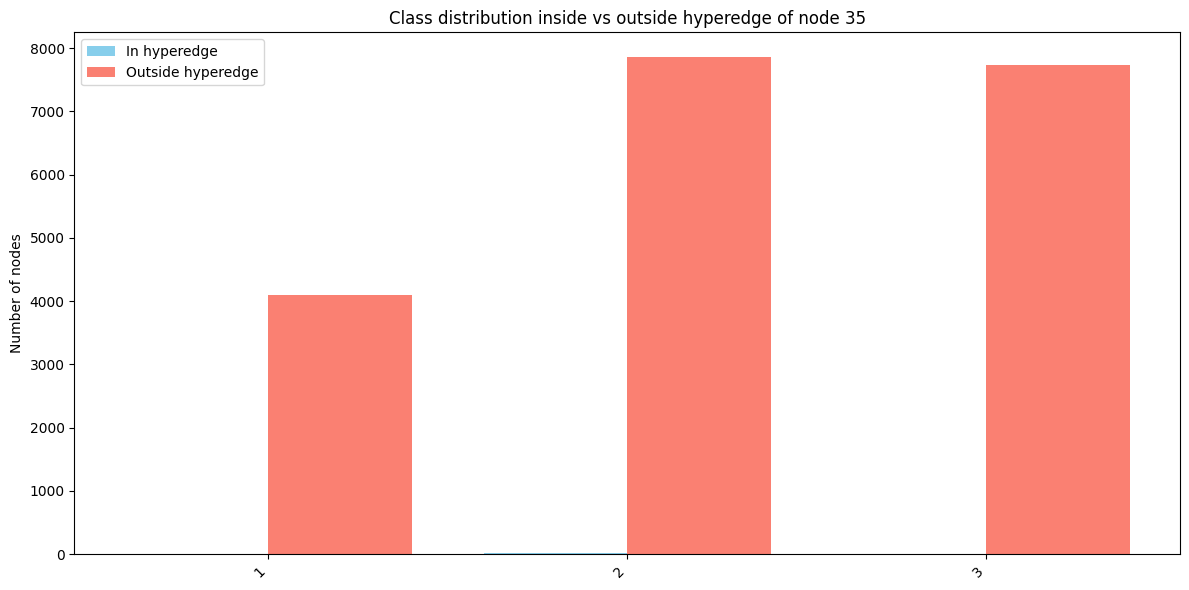

In [100]:
import matplotlib.pyplot as plt
from collections import Counter

hyperedge_35 = set(d[11927616])
hyperedge_35.add(11927616)

nodes_in_hyperedge = [n for n in nodes if n in hyperedge_35]
nodes_out_hyperedge = [n for n in nodes if n not in hyperedge_35]

classes_in = pubmed.loc[pubmed['PMID'].isin(nodes_in_hyperedge), 'label'].values
classes_out = pubmed.loc[pubmed['PMID'].isin(nodes_out_hyperedge), 'label'].values
count_in = Counter(classes_in)
count_out = Counter(classes_out)

all_classes = sorted(list(set(classes_in) | set(classes_out)))
in_values = [count_in.get(c, 0) for c in all_classes]
out_values = [count_out.get(c, 0) for c in all_classes]
x = range(len(all_classes))
width = 0.4

fig, ax = plt.subplots(figsize=(12,6))
ax.bar([i - width/2 for i in x], in_values, width=width, label='In hyperedge', color='skyblue')
ax.bar([i + width/2 for i in x], out_values, width=width, label='Outside hyperedge', color='salmon')
ax.set_xticks(x)
ax.set_xticklabels(all_classes, rotation=45, ha='right')
ax.set_ylabel('Number of nodes')
ax.set_title('Class distribution inside vs outside hyperedge of node 35')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import json
hypergraphs_json = {k: list(v) for k, v in hyperedges.items()}

with open('hyperedges_pubmed.json', 'w', encoding='utf-8') as f:
    json.dump(hypergraphs_json, f, indent=2, ensure_ascii=False)
